In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras import backend as K

#  to split the data of training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
 x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

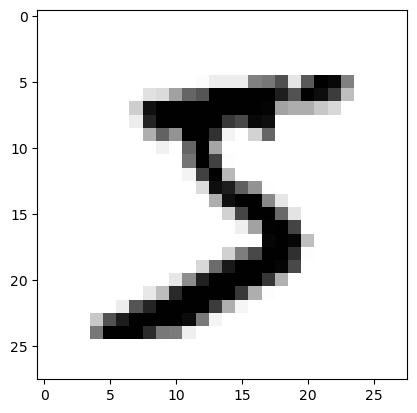

In [4]:
plt.imshow(x_train[0],cmap='binary')

In [5]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
x_train /= 255
x_test /= 255
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)
x_train.shape



(60000, 28, 28, 1)

In [6]:
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [7]:
model = Sequential()
model.add(Conv2D(32,(3, 3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dropout(0.25))
#model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

#model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dropout (Dropout)           (None, 7744)              0         
                                                                 
 dense (Dense)               (None, 10)                77450     
                                                        

In [8]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
#model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [9]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=4,verbose=1)
mc=ModelCheckpoint("./bestmodel.h5",monitor='val_accuracy',verbose=1,save_best_only=True)
cb=[es,mc]

In [10]:
his=model.fit(x_train,y_train,epochs=10,validation_split=0.3,callbacks=cb)

Epoch 1/10
1311/1313 [============================>.] - ETA: 0s - loss: 0.1675 - accuracy: 0.9488
Epoch 1: val_accuracy improved from -inf to 0.97894, saving model to .\bestmodel.h5
1313/1313 [==============================] - 40s 29ms/step - loss: 0.1675 - accuracy: 0.9488 - val_loss: 0.0685 - val_accuracy: 0.9789
Epoch 2/10
1312/1313 [============================>.] - ETA: 0s - loss: 0.0566 - accuracy: 0.9826
Epoch 2: val_accuracy improved from 0.97894 to 0.98122, saving model to .\bestmodel.h5
1313/1313 [==============================] - 36s 28ms/step - loss: 0.0568 - accuracy: 0.9825 - val_loss: 0.0620 - val_accuracy: 0.9812
Epoch 3/10
1312/1313 [============================>.] - ETA: 0s - loss: 0.0425 - accuracy: 0.9867
Epoch 3: val_accuracy improved from 0.98122 to 0.98233, saving model to .\bestmodel.h5
1313/1313 [==============================] - 36s 27ms/step - loss: 0.0425 - accuracy: 0.9867 - val_loss: 0.0619 - val_accuracy: 0.9823
Epoch 4/10
1311/1313 [=====================

In [11]:
model.save('mnist.h5')
print("Saving the bot as mnist.h5")

Saving the bot as mnist.h5


In [12]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 8ms/step - loss: 0.0361 - accuracy: 0.9883
Test loss: 0.0360962338745594
Test accuracy: 0.9883000254631042


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


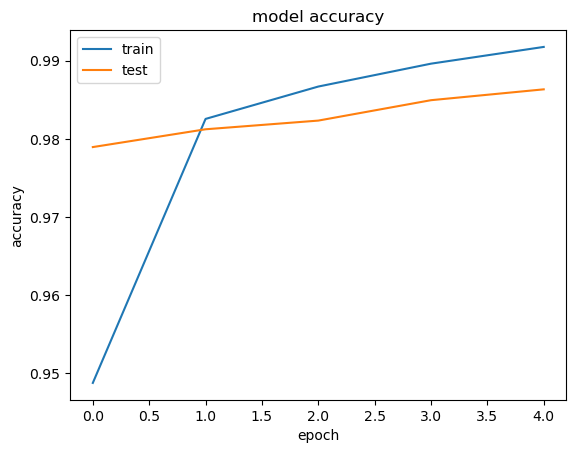

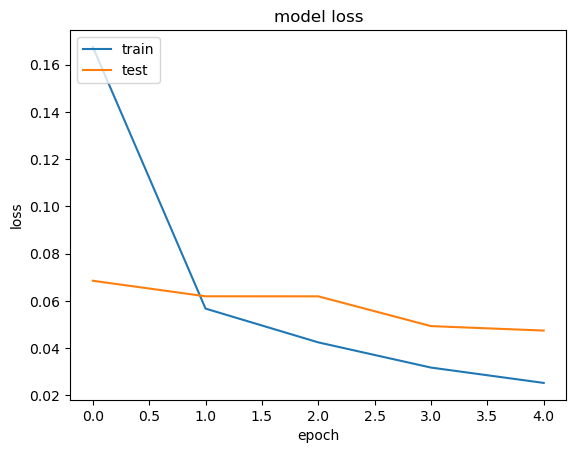

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in training
print(his.history.keys())

# summarize training for accuracy
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize traning for loss
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
from tokenize import Number
from numpy import testing
from numpy.lib.type_check import imag

import pygame, sys
from pygame import image
from pygame.locals import *
import numpy as np
from keras.models import load_model
import cv2
from tensorflow.python.keras.backend import constant


WINDOWSIZEX = 640
WINDOWSIZEY = 480

WHITE=(255,255,255)
BLACK=(0,0,0)
RED=(255,0,0)

IMAGESAVE=False

BOUNDARYINC = 5

MODEL = load_model("bestmodel.h5")

LABELS={0:"Zero", 1:"One", 2:"Two", 3:"Three", 4:"Four", 5:"Five", 6:"Six", 7:"Seven", 8:"Eight", 9:"Nine"}

pygame.init()

FONT=pygame.font.Font("freesansbold.ttf", 18)
DISPLAYSURF=pygame.display.set_mode((WINDOWSIZEX, WINDOWSIZEY))



pygame.display.set_caption("Digit Board")

iswriting=False

number_xcord=[]
number_ycord=[]
imag_cnt=1
PREDICT = True

while True:
    for event in pygame.event.get():
        if event.type==QUIT:
            pygame.quit()
            sys.exit()
        if event.type == MOUSEMOTION and iswriting:
            xcord, ycord = event.pos
            pygame.draw.circle(DISPLAYSURF, WHITE, (xcord, ycord), 4, 0)

            number_xcord.append(xcord)
            number_ycord.append(ycord)
        if event.type==MOUSEBUTTONUP:
            iswriting=False
            number_xcord=sorted(number_xcord)
            number_ycord=sorted(number_ycord)

            rect_min_x , rect_max_x = max(number_xcord[0]-BOUNDARYINC, 0),min(WINDOWSIZEX, number_xcord[-1]+BOUNDARYINC)
            rect_min_y , rect_max_y = max(number_ycord[0]-BOUNDARYINC, 0),min(WINDOWSIZEX, number_ycord[-1]+BOUNDARYINC)

            number_xcord=[]
            number_ycord=[]

            img_arr=np.array(pygame.PixelArray(DISPLAYSURF))[rect_min_x:rect_max_x,rect_min_y:rect_max_y].T.astype(np.float32)

            if IMAGESAVE:
                cv2.imwrite("image.png")
                imag_cnt +=1

            if PREDICT:
                image = cv2.resize(img_arr, (28,28))
                image = np.pad(image, (10,10), "constant", constant_values = 0)
                image = cv2.resize(image, (28,28))/255

                label = str(LABELS[np.argmax(MODEL.predict(image.reshape(1,28,28,1)))])

                textSurface = FONT.render(label, True, RED, WHITE)
                textRecObj = textSurface.get_rect()
                textRecObj.left , textRecObj.bottom = rect_min_x, rect_max_y

                DISPLAYSURF.blit(textSurface , textRecObj)
            if event.type==KEYDOWN:
                if event.unicode=='n':
                    DISPLAYSURF.fill(BLACK)

        pygame.display.update()

        if event.type == MOUSEBUTTONDOWN:
            iswriting=True

1/1 [==============================] - 0s 18ms/step


SystemExit: 